In [1]:
import matplotlib
from matplotlib import transforms, pyplot as plt
import numpy as np

%matplotlib inline

import logging
logging.getLogger('matplotlib.font_manager').disabled = True

In [2]:
# define colors
GRAY1, GRAY2, GRAY3 = '#231F20', '#414040', '#555655'
GRAY4, GRAY5, GRAY6 = '#646369', '#76787B', '#828282'
GRAY7, GRAY8, GRAY9 = '#929497', '#A6A6A5', '#BFBEBE'
BLUE1, BLUE2, BLUE3, BLUE4 = '#174A7E', '#4A81BF', '#94B2D7', '#94AFC5'
RED1, RED2 = '#C3514E', '#E6BAB7'
GREEN1, GREEN2 = '#0C8040', '#9ABB59'
ORANGE1 = '#F79747'

In [3]:
# matplotlib doesn't have a function for drawing text with
# different colors, let's implement it
def rainbow_text(x, y, text, colors, spacing=20, ax=None, **kw):
    colors = list(reversed(colors))
    t = ax.transData
    canvas = ax.figure.canvas

    for i, line in enumerate(reversed(text.split('\n'))):
        strings = line.split('||')
        for s, c in zip(strings, colors[i]):
            text = ax.text(x, y, s, color=c, transform=t, **kw)
            text.draw(canvas.get_renderer())
            ex = text.get_window_extent()
            t = transforms.offset_copy(text._transform, x=ex.width, 
                                       units='dots')

        t = transforms.offset_copy(ax.transData, x=0, y=(i + 1) * spacing, 
                                   units='dots')

In [4]:
# configure plot font family to Arial
plt.rcParams['font.family'] = 'Arial'
# configure mathtext bold and italic font family to Arial
matplotlib.rcParams['mathtext.fontset'] = 'custom'
matplotlib.rcParams['mathtext.bf'] = 'Arial:bold'
matplotlib.rcParams['mathtext.it'] = 'Arial:italic'

In [5]:
# survey responses
X = ['Colleague recommendation', 'Previous work together', 
     'Affordability of services', 'National reputation', 
     'Local knowledge', 'Content expertise', 'Demonstration of results']
Y = [3, 16, 18, 20, 45, 55, 70]  # responses distribution

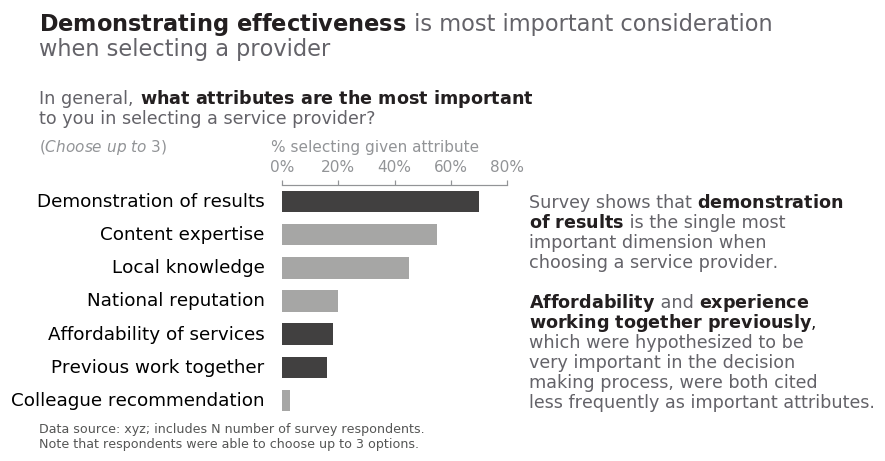

In [6]:
# create new figure
fig, ax1 = plt.subplots(figsize=(8.2, 4.2),  # width, height in inches
                        dpi=110)             # resolution of the figure

# tune the subplot layout by setting sides of the figure
fig.subplots_adjust(left=0.28, right=0.53, top=0.61, bottom=0.107)

# draw horizontal bars
ax1.barh(range(len(X)),
         Y,
         height=0.65,
         color=[GRAY8] + [GRAY2]*2 + [GRAY8]*3 + [GRAY2])

# set the data limits for the y-axis and x-axis
ax1.set_xlim([0, 80])
ax1.set_ylim([-0.5, 6.5])

# set properties for axes object
plt.setp(ax1,
         xticks=[0, 20, 40, 60, 80],  # 5 x-ticks only 0 and 1
         xticklabels=['0%', '20%', '40%', '60%', '80%'],  # with n% labels
         yticks=np.arange(len(X)),  # tick for all response
         yticklabels=X)  # with text labels

# change the appearance of ticks, tick labels, and gridlines 
ax1.tick_params(top=True, bottom=False, left=False, 
                labelbottom=False, labeltop=True)

# configure x tick label appearance
for item in ax1.get_xticklabels():
    item.set_color(GRAY7)

# configure y tick label appearance
for item in ax1.get_yticklabels():
    item.set_fontsize(12)
    # use trasformations to shift y tick labels
    # left y labels slightly right, and right labels slightly left
    offset = transforms.ScaledTranslation(-0.06, 0.02, fig.dpi_scale_trans)
    item.set_transform(item.get_transform() + offset)

# remove chart border
ax1.tick_params(color=GRAY7)
ax1.spines['top'].set_color(GRAY7)
ax1.spines['left'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['bottom'].set_visible(False)

# title the plot
rainbow_text(-86, 10.4,
             '$\\bf{Demonstrating\ effectiveness}$||'
             ' is most important consideration\n'
             'when selecting a provider',
             [[GRAY1, GRAY4], [GRAY4]],
             spacing=25,
             ax=ax1,
             fontsize=14.7)

# survey question
rainbow_text(-86, 8.35,
             'In general, ||$\\bf{what\ attributes\ are\ the\ most\ '
             'important}$\n'
             'to you in selecting a service provider?',
             [[GRAY4, GRAY1], [GRAY4]],
             spacing=20,
             ax=ax1,
             fontsize=11.5)
ax1.text(-86, 7.5, '$\\it{(Choose\ up\ to\ 3)}$', color=GRAY7, fontsize=10)
ax1.text(-4, 7.5, '% selecting given attribute', color=GRAY7, fontsize=10)

# text note with survey result
rainbow_text(87.6, 4,
             'Survey shows that ||$\\bf{demonstration}$\n'
             '$\\bf{of\ results}$|| is the single most\n'
             'important dimension when\n'
             'choosing a service provider.',
             [[GRAY4, GRAY1], [GRAY1, GRAY4],
              [GRAY4], [GRAY4]],
             spacing=20,
             ax=ax1,
             fontsize=11.5)

# text note with initial hypothesis
rainbow_text(87.6, -0.2,
             '$\\bf{Affordability}$|| and ||$\\bf{experience}$\n'
             '$\\bf{working\ together\ previously}$,\n'
             'which were hypothesized to be\n'
             'very important in the decision\n'
             'making process, were both cited\n'
             'less frequently as important attributes.',
             [[GRAY1, GRAY4, GRAY1], [GRAY1],
              [GRAY4], [GRAY4], [GRAY4], [GRAY4]],
             spacing=20,
             ax=ax1,
             fontsize=11.5)

# footnote with the data source
ax1.text(-86, -1.4,
         'Data source: xyz; includes N number of survey respondents.\n'
         'Note that respondents were able to choose up to 3 options.',
         fontsize=8.3,
         color=GRAY3);